In [34]:
%load_ext autoreload
%autoreload 2

from stochastic_service_composition.dfa_target import mdp_from_dfa
from stochastic_service_composition.declare_utils import *
from docs.notebooks.utils import render_mdp_dfa
#from setup_v2 import *
import logaut
import pylogics.parsers.ldl
from stochastic_service_composition.dfa_target import from_symbolic_automaton_to_declare_automaton

def target_service_ltlf(constraints, symbols):
    constraints.append(build_declare_assumption(symbols))
    formula_str = " & ".join(map(lambda s: f"({s})", constraints))
    formula = pylogics.parsers.parse_ltl(formula_str)
    automaton = logaut.core.ltl2dfa(formula, backend="lydia")
    declare_automaton = from_symbolic_automaton_to_declare_automaton(automaton, symbols)
    return declare_automaton

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
PICK_DESIGN = "p_d"
PICK_SILICON = "p_s"
PICK_IMPURITIES = "p_i"
PICK_RESIST = "p_r"
PICK_CHEMICALS = "p_c"
MASK_CREATION = "cr_m"
PHOTOLITOGRAPHY = "ph_l"
ETCHING = "et"
DEPOSITION = "dep"
ION_IMPLANTATION = "ion_i"
PROCESSING = "proc"
TESTING = "tes"
TESTING_GRAPHICS = "tes_gr"
QUALITY = "qual"
QUALITY_GRAPHICS = "qual_gr"
DICING = "dic"
CLASSIC_PACKAGING = "pac"  
THERMAL_PACKAGING = "pac_t"

In [38]:
%load_ext autoreload
%autoreload 2
ALL_SYMBOLS = [
    PICK_DESIGN,
    PICK_SILICON,
    PICK_IMPURITIES,
    PICK_RESIST,
    PICK_CHEMICALS,
    MASK_CREATION,
    PHOTOLITOGRAPHY,
    ETCHING,
    DEPOSITION,
    ION_IMPLANTATION,
    PROCESSING,
    TESTING,
    TESTING_GRAPHICS,
    QUALITY,
    QUALITY_GRAPHICS,
    DICING,
    CLASSIC_PACKAGING,
    THERMAL_PACKAGING
]

ALL_SYMBOLS_SET = set(ALL_SYMBOLS)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
declare_constraints = [
    exactly_once(PICK_DESIGN),
    exactly_once(PICK_SILICON),
    exactly_once(PICK_IMPURITIES),
    exactly_once(PICK_RESIST),
    exactly_once(PICK_CHEMICALS),
    exactly_once(MASK_CREATION),
    exactly_once(PHOTOLITOGRAPHY),
    exactly_once(ETCHING),
    exactly_once(DEPOSITION),
    exactly_once(ION_IMPLANTATION),
    exactly_once(PROCESSING),
    exactly_once(DICING),
    
    absence_2(TESTING),
    absence_2(TESTING_GRAPHICS),
    absence_2(QUALITY),
    absence_2(QUALITY_GRAPHICS),
    absence_2(THERMAL_PACKAGING),
    absence_2(CLASSIC_PACKAGING),
    
    alt_succession(PICK_DESIGN, MASK_CREATION),
    alt_succession(PICK_SILICON, MASK_CREATION),
    alt_succession(PICK_IMPURITIES, MASK_CREATION),
    alt_succession(PICK_RESIST, MASK_CREATION),
    alt_succession(PICK_CHEMICALS, MASK_CREATION),
    
    alt_succession(MASK_CREATION, PHOTOLITOGRAPHY),
    alt_succession(PHOTOLITOGRAPHY, ETCHING),
    alt_succession(ETCHING, DEPOSITION),
    alt_succession(DEPOSITION, ION_IMPLANTATION),
    alt_succession(ION_IMPLANTATION, PROCESSING),
    
    alt_precedence(PROCESSING, TESTING),
    alt_precedence(PROCESSING, TESTING_GRAPHICS),
    
    alt_succession(TESTING, QUALITY),
    alt_succession(TESTING_GRAPHICS, QUALITY_GRAPHICS),
    
    #dicing
    #precedence(QUALITY, DICING),
    #precedence(QUALITY_GRAPHICS, DICING),
    alt_response(QUALITY, DICING),
    alt_response(QUALITY_GRAPHICS, DICING),
    precedence_or(QUALITY, QUALITY_GRAPHICS, DICING),
    
    alt_precedence(DICING, CLASSIC_PACKAGING),
    alt_precedence(DICING, THERMAL_PACKAGING),
    
    not_coexistence(TESTING, TESTING_GRAPHICS),
    not_coexistence(QUALITY, QUALITY_GRAPHICS),
    not_coexistence(CLASSIC_PACKAGING, THERMAL_PACKAGING),
    
    build_declare_assumption(ALL_SYMBOLS_SET)
]

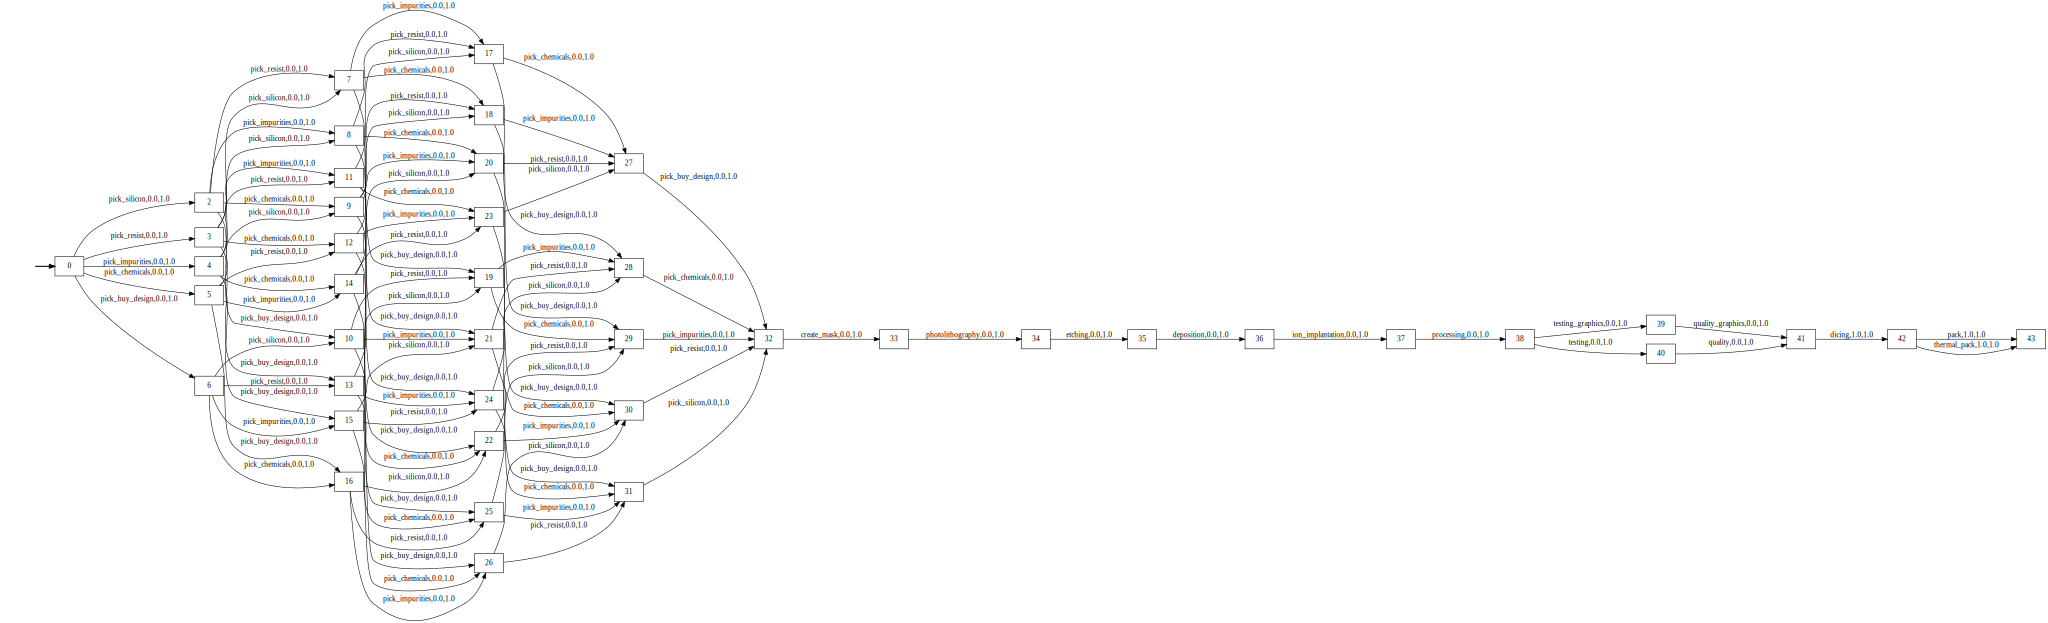

In [42]:
declare_automaton = target_service_ltlf(declare_constraints, ALL_SYMBOLS_SET)
render_mdp_dfa(mdp_from_dfa(declare_automaton), no_sink=True)